In [1]:
import numpy as np
from scipy.sparse import csr_matrix

In [2]:
# Cargar archivo de users y skills
labels = []
with open("skill_id", "r") as skills:
    for line in skills:
        label = line.split(" :")
        labels.append(unicode(label[0], "utf-8"))
    d = int(label[1]) + 1

rows = np.array([], dtype=int)
cols = np.array([], dtype=int)
with open("user_skill", "r") as users:
    n = 0
    for line in users:
        user, str_skills = line.split(":")
        str_skills = str_skills.split(",")
        int_skills =  map(int, str_skills)
        rows = np.concatenate((rows, np.array([int(user) for i in int_skills])))
        cols = np.concatenate((cols, int_skills))
        n += 1

data = np.ones(rows.shape[0])

print "Generando matriz..."
Z = csr_matrix((data, (rows, cols)), shape=(n, d))
print "Matriz generada de tamaño",Z.shape

Generando matriz...
Matriz generada de tamaño (7890, 14544)


In [3]:
# Generar training set y testing set general
np.random.seed(20)
indices = np.arange(n)
tr_size =  int(np.random.random() * n)
# Indices de usuarios que quedaron en training set
tr_indices = np.random.choice(indices, tr_size, replace=False)
mask = np.ones(indices.shape, dtype=bool)
mask[tr_indices] = False
# Indices de usuarios que quedaron en testing set
ts_indices = indices[mask]
# Particionado
Ztr = Z[tr_indices]
print "Matriz generada de tamaño",Ztr.shape
Zts = Z[ts_indices]
print "Matriz generada de tamaño",Zts.shape

Matriz generada de tamaño (4640, 14544)
Matriz generada de tamaño (3250, 14544)


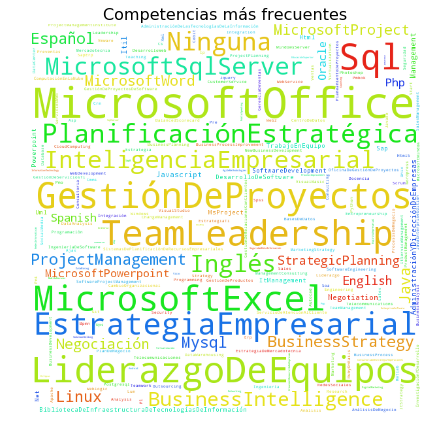

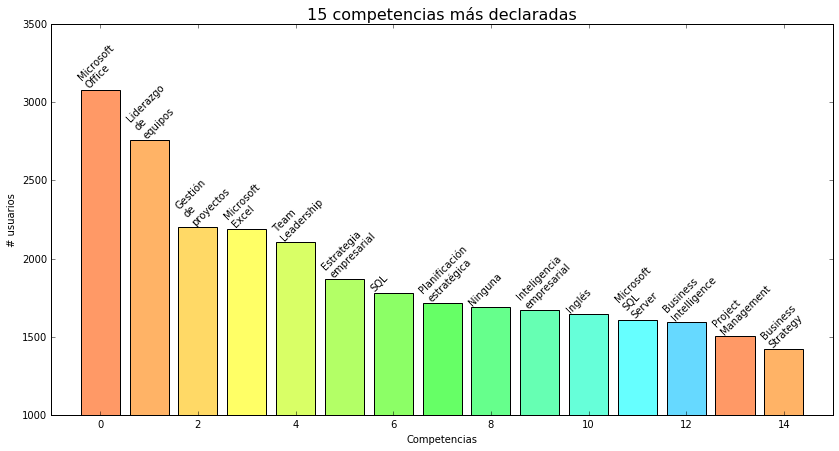

In [6]:
%matplotlib inline
# Graficar data: wordcloud y top 10
# Requiere la herramienta word_cloud disponible desde https://github.com/amueller/word_cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocesar skills para mostrarlas
text = " ".join([labels[i].title().replace(" ", "") for i in cols])
# Generar wordcloud
wordcloud = WordCloud(width=600, height=600, background_color="white",
                      relative_scaling=0.1, prefer_horizontal=0.7).generate(text)
plt.figure(figsize=(7,7))
plt.title(u"Competencias más frecuentes", fontsize=16)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Contar frecuencia de skills y ordenar decreciente
nmax = 15
freq = np.bincount(cols)
s = np.argsort(freq)[::-1]
freq = freq[s]
plotlabels = np.array(labels)[s]
plotlabels = [label.replace(" ", "\n") for label in plotlabels]
colors = ['#ff9966','#ffb366','#ffd966','#ffff66','#d9ff66','#b3ff66','#8cff66','#66ff66','#66ff8c','#66ffb3', '#66ffd9', '#66ffff', '#66d9ff']
plt.figure(figsize=(14,7))
plt.title(str(nmax)+u' competencias más declaradas', fontsize=16)
rect = plt.bar(np.arange(nmax), freq[0:nmax], bottom=0, align="center", color=colors)
for i in range(nmax):
    plt.text(i-0.5, freq[i] , plotlabels[i], rotation=45, ha='left', va='bottom')
plt.ylabel("# usuarios")
plt.xlabel("Competencias")
plt.ylim([1000, 3500])
plt.xlim([-1,nmax])
plt.show()

In [11]:
# Generar para una skill en especifico el training test y el testing set
myskill = 29
print "Skill elegida:",labels[myskill]
Y = Z[:,myskill].toarray().T[0]
X = csr_matrix(np.delete(Z.toarray(), myskill, 1))

Ytr = Ztr[:,myskill].toarray().T[0]
Xtr = csr_matrix(np.delete(Ztr.toarray(), myskill, 1))

Yts = Zts[:,myskill].toarray().T[0]
Xts = csr_matrix(np.delete(Zts.toarray(), myskill, 1))

Skill elegida: Microsoft Office


In [12]:
# Generar clasificadores para predecir si un usuario tiene la competencia "myskill" o no dadas las demas competencias
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)
logreg.fit(Xtr, Ytr)
print logreg.score(Xts, Yts)

0.707384615385
